In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [204]:
all_vaccinations_data_df = pd.read_csv("policy_databox/vaccinations.csv")

all_vaccinations_data_df.columns
print(all_vaccinations_data_df.head())

all_cases_data_df = pd.read_csv("policy_databox/full_data.csv")

      location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0

In [205]:
US_POPULATION = 346000000
us_cases_data_df = all_cases_data_df[all_cases_data_df["location"] == "United States"]
us_cases_data_df.reset_index(drop=True, inplace=True)
us_cases_data_df["date"] = pd.to_datetime(us_cases_data_df["date"])

us_vac_data_df = all_vaccinations_data_df[all_vaccinations_data_df["iso_code"] == "USA"]
us_vac_data_df.reset_index(inplace=True, drop=True)
us_vac_data_df.fillna(0, inplace=True)
us_vac_data_df["date"] = pd.to_datetime(us_vac_data_df["date"], format="%Y-%m-%d")
us_vac_data_df["cumulative_people_vaccinated"] = us_vac_data_df["daily_people_vaccinated"].cumsum()

us_vac_data_df.head()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1719053686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_cases_data_df["date"] = pd.to_datetime(us_cases_data_df["date"])
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1719053686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_vac_data_df.fillna(0, inplace=True)
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1719053686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,cumulative_people_vaccinated
0,United States,USA,2020-12-13,45620.0,36817.0,9669.0,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.000,0.0
1,United States,USA,2020-12-14,50468.0,41465.0,9833.0,0.0,4848.0,4848.0,0.02,0.01,0.0,0.0,15.0,4648.0,0.001,4648.0
2,United States,USA,2020-12-15,98353.0,87883.0,10161.0,0.0,47885.0,26366.0,0.03,0.03,0.0,0.0,79.0,25533.0,0.008,30181.0
3,United States,USA,2020-12-16,258504.0,243398.0,10679.0,0.0,160151.0,70961.0,0.08,0.07,0.0,0.0,214.0,68860.0,0.021,99041.0
4,United States,USA,2020-12-17,533742.0,511644.0,11505.0,0.0,275238.0,122030.0,0.16,0.15,0.0,0.0,368.0,118707.0,0.036,217748.0


In [206]:
last_row = us_vac_data_df.iloc[-1]
print(last_row)

location                                     United States
iso_code                                               USA
date                                   2023-05-09 00:00:00
total_vaccinations                             676728782.0
people_vaccinated                              270227181.0
people_fully_vaccinated                        230637348.0
total_boosters                                         0.0
daily_vaccinations_raw                             11751.0
daily_vaccinations                                 62309.0
total_vaccinations_per_hundred                      203.83
people_vaccinated_per_hundred                        81.39
people_fully_vaccinated_per_hundred                  69.47
total_boosters_per_hundred                             0.0
daily_vaccinations_per_million                       188.0
daily_people_vaccinated                             7748.0
daily_people_vaccinated_per_hundred                  0.002
cumulative_people_vaccinated                   270362757

In [207]:
CANADA_POPULATION = 41000000
canada_cases_data_df = all_cases_data_df[all_cases_data_df["location"] == "Canada"]
canada_cases_data_df.reset_index(drop=True, inplace=True)
canada_cases_data_df["date"] = pd.to_datetime(canada_cases_data_df["date"])

canada_vac_data_df = all_vaccinations_data_df[all_vaccinations_data_df["iso_code"] == "CAN"]
canada_vac_data_df.reset_index(inplace=True, drop=True)
canada_vac_data_df.fillna(0, inplace=True)
canada_vac_data_df["date"] = pd.to_datetime(canada_vac_data_df["date"], format="%Y-%m-%d")
canada_vac_data_df["cumulative_people_vaccinated"] = canada_vac_data_df["daily_people_vaccinated"].cumsum()
canada_vac_data_df.head()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1451929379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_cases_data_df["date"] = pd.to_datetime(canada_cases_data_df["date"])
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1451929379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_vac_data_df.fillna(0, inplace=True)
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1451929379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,cumulative_people_vaccinated
0,Canada,CAN,2020-12-14,5.0,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
1,Canada,CAN,2020-12-15,726.0,726.0,0.0,0.0,721.0,721.0,0.00,0.00,0.0,0.0,19.0,721.0,0.002,721.0
2,Canada,CAN,2020-12-16,3027.0,3027.0,0.0,0.0,2301.0,1511.0,0.01,0.01,0.0,0.0,39.0,1511.0,0.004,2232.0
3,Canada,CAN,2020-12-17,7282.0,7282.0,0.0,0.0,4255.0,2426.0,0.02,0.02,0.0,0.0,63.0,2426.0,0.006,4658.0
4,Canada,CAN,2020-12-18,11297.0,11297.0,0.0,0.0,4015.0,2823.0,0.03,0.03,0.0,0.0,73.0,2823.0,0.007,7481.0


In [208]:
cutoff_date = pd.to_datetime("2023-05-09 00:00:00")
us_vac_data_df = us_vac_data_df.loc[us_vac_data_df["date"] < cutoff_date]
canada_vac_data_df = canada_vac_data_df.loc[canada_vac_data_df["date"] < cutoff_date]


def replace_trailing_zeros_with_last_nonzero(df, column):
    last_nonzero = df[column].replace(0, pd.NA).ffill().iloc[-1]
    df[column] = df[column].replace(0, pd.NA).ffill().fillna(last_nonzero)
    return df

us_vac_data_df = replace_trailing_zeros_with_last_nonzero(us_vac_data_df, "people_fully_vaccinated")
canada_vac_data_df = replace_trailing_zeros_with_last_nonzero(canada_vac_data_df, "people_fully_vaccinated")

us_vac_data_df = replace_trailing_zeros_with_last_nonzero(us_vac_data_df, "total_vaccinations")
canada_vac_data_df = replace_trailing_zeros_with_last_nonzero(canada_vac_data_df, "total_vaccinations")

# us_vac_data_df["total_vaccinations_smoothed"] = (
#     us_vac_data_df["people_vaccinated"].rolling(window=7, min_periods=1).mean()
# )
# canada_vac_data_df["total_vaccinations_smoothed"] = (
#     canada_vac_data_df["people_vaccinated"].rolling(window=7, min_periods=1).mean()
# )

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1500882875.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(0, pd.NA).ffill().fillna(last_nonzero)
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_15295/1500882875.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  last_nonzero = df[column].replace(0, pd.NA).ffill().iloc[-1]


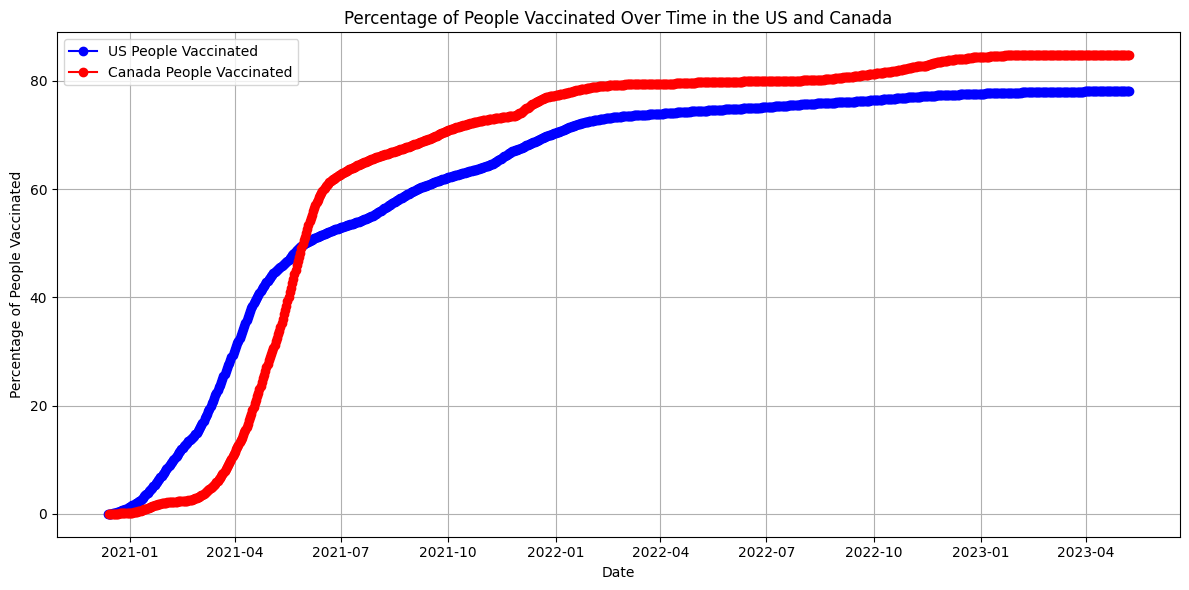

In [209]:
us_vac_data_df["percent_people_vaccinated"] = us_vac_data_df["cumulative_people_vaccinated"] / US_POPULATION * 100
canada_vac_data_df["percent_people_vaccinated"] = (
    canada_vac_data_df["cumulative_people_vaccinated"] / CANADA_POPULATION * 100
)

# Plot the percentage of people vaccinated over time for both countries
plt.figure(figsize=(12, 6))

plt.plot(
    us_vac_data_df["date"],
    us_vac_data_df["percent_people_vaccinated"],
    marker="o",
    linestyle="-",
    color="blue",
    label="US People Vaccinated",
)

plt.plot(
    canada_vac_data_df["date"],
    canada_vac_data_df["percent_people_vaccinated"],
    marker="o",
    linestyle="-",
    color="red",
    label="Canada People Vaccinated",
)

plt.xlabel("Date")
plt.ylabel("Percentage of People Vaccinated")
plt.title("Percentage of People Vaccinated Over Time in the US and Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

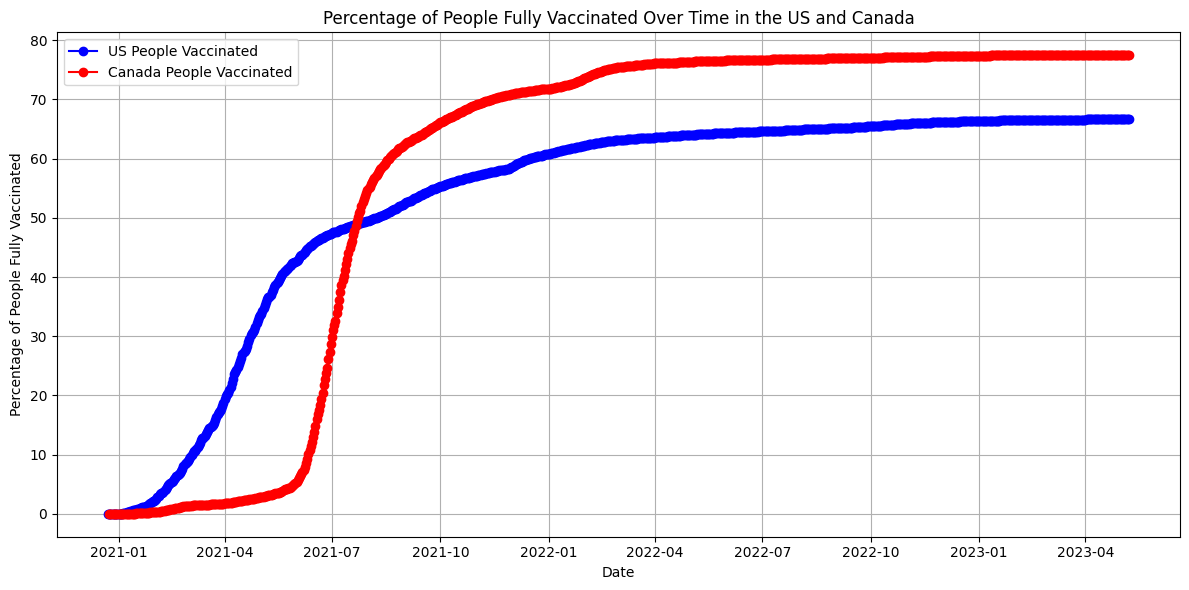

In [210]:
us_vac_data_df["percent_people_fully_vaccinated"] = us_vac_data_df["people_fully_vaccinated"] / US_POPULATION * 100
canada_vac_data_df["percent_people_fully_vaccinated"] = (
    canada_vac_data_df["people_fully_vaccinated"] / CANADA_POPULATION * 100
)

# Plot the percentage of people vaccinated over time for both countries
plt.figure(figsize=(12, 6))

plt.plot(
    us_vac_data_df["date"][10:],
    us_vac_data_df["percent_people_fully_vaccinated"][10:],
    marker="o",
    linestyle="-",
    color="blue",
    label="US People Vaccinated",
)

plt.plot(
    canada_vac_data_df["date"][10:],
    canada_vac_data_df["percent_people_fully_vaccinated"][10:],
    marker="o",
    linestyle="-",
    color="red",
    label="Canada People Vaccinated",
)

plt.xlabel("Date")
plt.ylabel("Percentage of People Fully Vaccinated")
plt.title("Percentage of People Fully Vaccinated Over Time in the US and Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

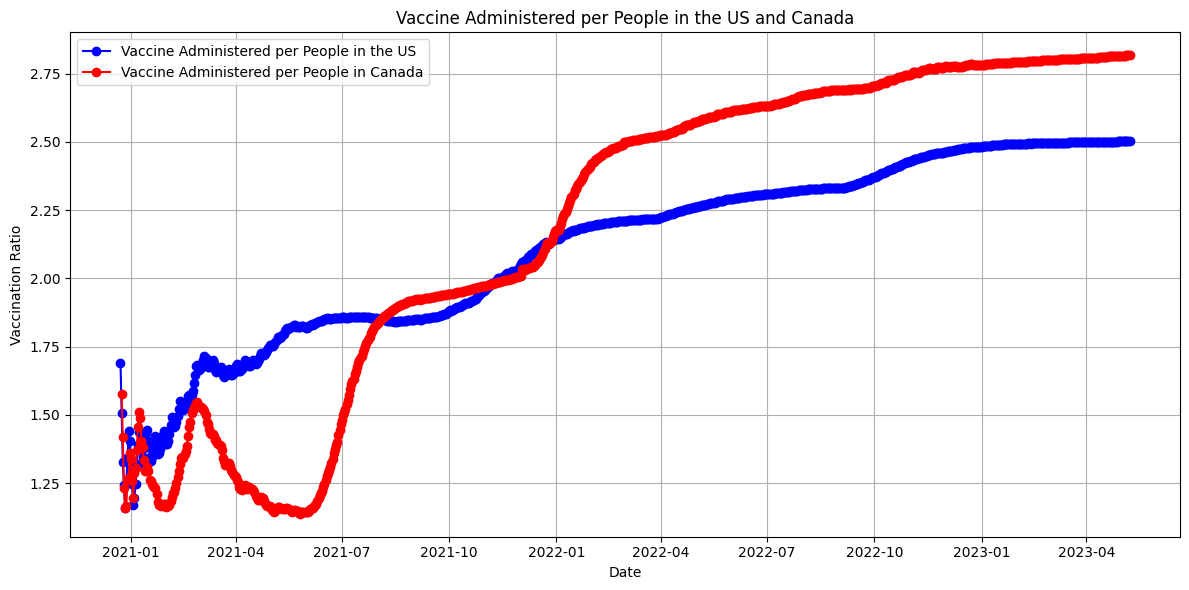

2.5030682194610274
2.8172364960387215


In [211]:
us_vac_data_df["vaccine_administered_per_people"] = (
    us_vac_data_df["total_vaccinations"] / us_vac_data_df["cumulative_people_vaccinated"]
)
canada_vac_data_df["vaccine_administered_per_people"] = (
    canada_vac_data_df["total_vaccinations"] / canada_vac_data_df["cumulative_people_vaccinated"]
)

# Plot the percentage of people vaccinated over time for both countries
plt.figure(figsize=(12, 6))

plt.plot(
    us_vac_data_df["date"][10:],
    us_vac_data_df["vaccine_administered_per_people"][10:],
    marker="o",
    linestyle="-",
    color="blue",
    label="Vaccine Administered per People in the US",
)

plt.plot(
    canada_vac_data_df["date"][10:],
    canada_vac_data_df["vaccine_administered_per_people"][10:],
    marker="o",
    linestyle="-",
    color="red",
    label="Vaccine Administered per People in Canada",
)

plt.xlabel("Date")
plt.ylabel("Vaccination Ratio")
plt.title("Vaccine Administered per People in the US and Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(us_vac_data_df["vaccine_administered_per_people"].iloc[-1])
print(canada_vac_data_df["vaccine_administered_per_people"].iloc[-1])

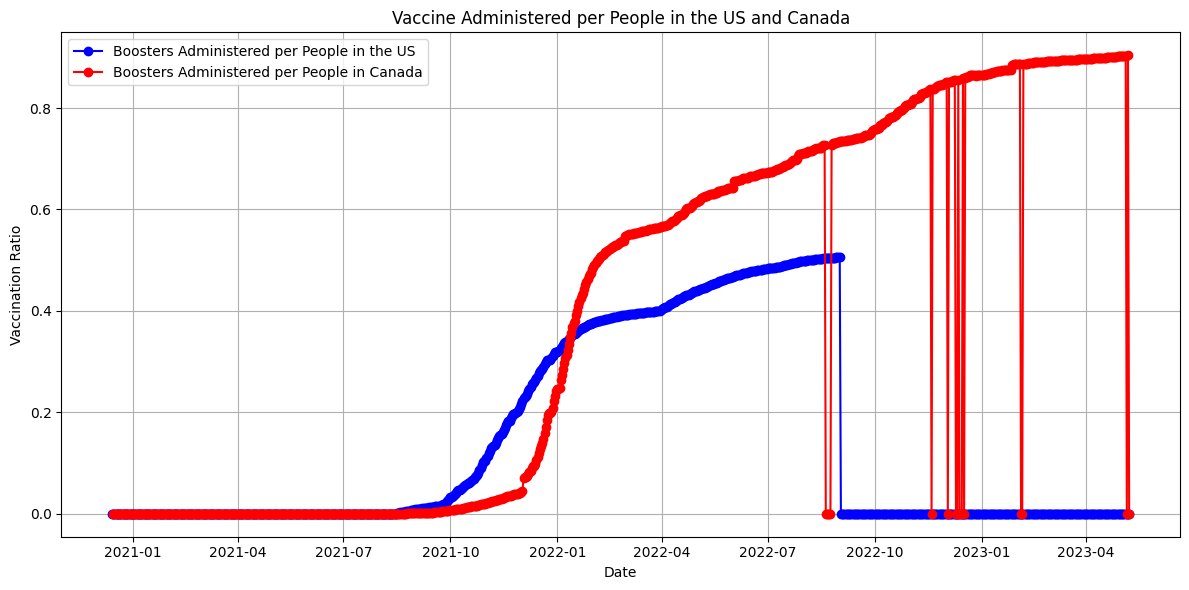

0.0
0.0


In [212]:
us_vac_data_df["booster_administered_per_people"] = (
    us_vac_data_df["total_boosters"] / us_vac_data_df["cumulative_people_vaccinated"]
)
canada_vac_data_df["booster_administered_per_people"] = (
    canada_vac_data_df["total_boosters"] / canada_vac_data_df["cumulative_people_vaccinated"]
)

# Plot the percentage of people vaccinated over time for both countries
plt.figure(figsize=(12, 6))

plt.plot(
    us_vac_data_df["date"],
    us_vac_data_df["booster_administered_per_people"],
    marker="o",
    linestyle="-",
    color="blue",
    label="Boosters Administered per People in the US",
)

plt.plot(
    canada_vac_data_df["date"],
    canada_vac_data_df["booster_administered_per_people"],
    marker="o",
    linestyle="-",
    color="red",
    label="Boosters Administered per People in Canada",
)

plt.xlabel("Date")
plt.ylabel("Vaccination Ratio")
plt.title("Vaccine Administered per People in the US and Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(us_vac_data_df["booster_administered_per_people"].iloc[-1])
print(canada_vac_data_df["booster_administered_per_people"].iloc[-1])

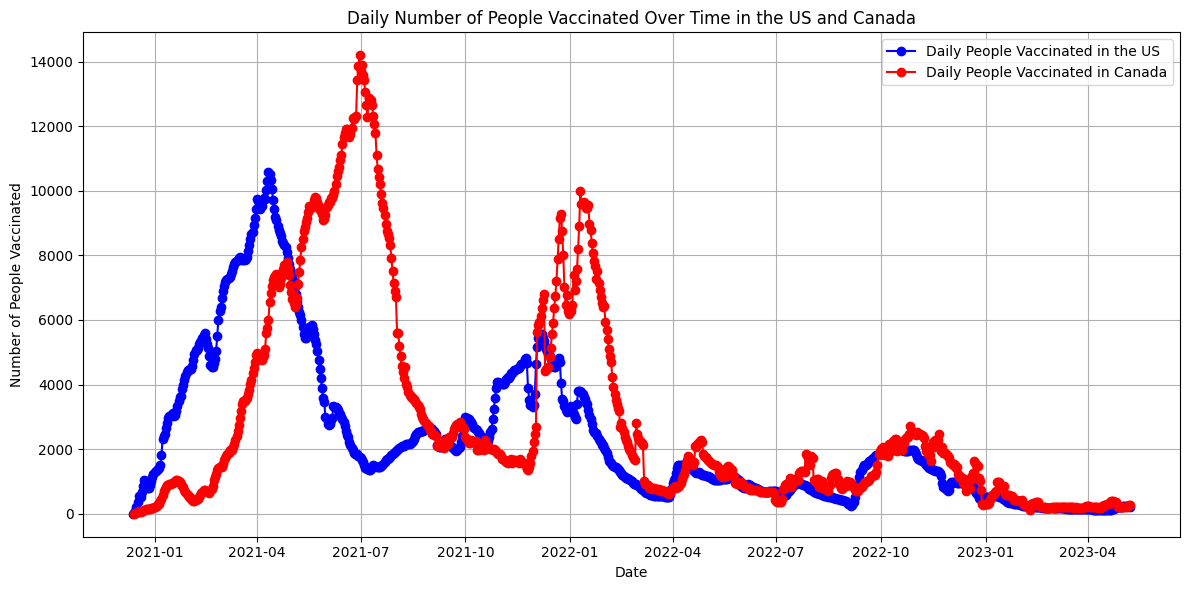

In [213]:
# Plot the daily number of people vaccinated over time for both countries
plt.figure(figsize=(12, 6))

plt.plot(
    us_vac_data_df["date"],
    us_vac_data_df["daily_vaccinations_per_million"],
    marker="o",
    linestyle="-",
    color="blue",
    label="Daily People Vaccinated in the US",
)

plt.plot(
    canada_vac_data_df["date"],
    canada_vac_data_df["daily_vaccinations_per_million"],
    marker="o",
    linestyle="-",
    color="red",
    label="Daily People Vaccinated in Canada",
)

plt.xlabel("Date")
plt.ylabel("Number of People Vaccinated")
plt.title("Daily Number of People Vaccinated Over Time in the US and Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()